<a href="https://colab.research.google.com/github/wds901209/ML.github.to/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#讀取資料
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
data

# y = w*x + b
x = data["YearsExperience"]
y = data["Salary"]

In [ ]:
def compute_gradient(x, y, w, b):
  # cost function 對 w 微分 ，可得w方向斜率(做加總再平均)
  w_gradient = (x*(w*x+b-y)).sum()/len(x)
  # cost function 對 b 微分 ，可得b方向斜率
  b_gradient = ((w*x+b-y)).mean() #.mean就等於直接計算平均

  return w_gradient, b_gradient

In [ ]:
compute_gradient(x, y, 20, 10)

(268.54757575757577, 35.084848484848486)

In [ ]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost

In [ ]:
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_inter, p_inter=1000):

  c_hist = []
  w_hist = []
  b_hist = []
  w = w_init
  b = b_init

  for i in range(run_inter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = compute_cost(x, y, w, b)

    c_hist.append(cost)
    w_hist.append(w)
    b_hist.append(b)

    if i % p_inter == 0:
      print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w: .2e}, b: {b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [ ]:
w_init = 0
b_init = 0
learning_rate = 1.0e-3 #1.0*10^-3
run_iter = 20000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)


Iteration     0 : Cost  5.6568e+03, w:  4.36e-01, b:  7.26e-02, w_gradient: -4.36e+02, b_gradient: -7.26e+01
Iteration  1000 : Cost  1.4097e+02, w:  1.21e+01, b:  8.07e+00, w_gradient:  8.00e-01, b_gradient: -5.32e+00
Iteration  2000 : Cost  9.6063e+01, w:  1.14e+01, b:  1.27e+01, w_gradient:  6.12e-01, b_gradient: -4.08e+00
Iteration  3000 : Cost  6.9732e+01, w:  1.09e+01, b:  1.63e+01, w_gradient:  4.69e-01, b_gradient: -3.12e+00
Iteration  4000 : Cost  5.4293e+01, w:  1.05e+01, b:  1.91e+01, w_gradient:  3.59e-01, b_gradient: -2.39e+00
Iteration  5000 : Cost  4.5241e+01, w:  1.02e+01, b:  2.12e+01, w_gradient:  2.75e-01, b_gradient: -1.83e+00
Iteration  6000 : Cost  3.9933e+01, w:  9.91e+00, b:  2.28e+01, w_gradient:  2.10e-01, b_gradient: -1.40e+00
Iteration  7000 : Cost  3.6821e+01, w:  9.73e+00, b:  2.40e+01, w_gradient:  1.61e-01, b_gradient: -1.07e+00
Iteration  8000 : Cost  3.4996e+01, w:  9.59e+00, b:  2.49e+01, w_gradient:  1.23e-01, b_gradient: -8.22e-01
Iteration  9000 : C

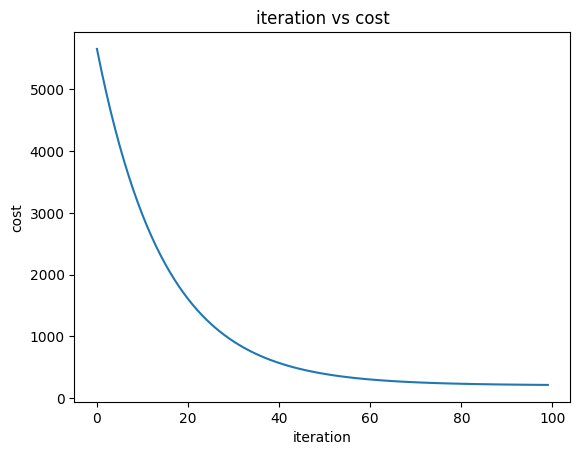

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 100), c_hist[:100]) #只看前100筆
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [ ]:
#找到那條直線了!!
print(f"最終w b=({w_final:.2f}, {b_final:.2f})")

最終w b=(9.14, 27.89)


In [ ]:
print(f"年資3.5  預測薪水:{w_final*3.5 + b_final:.1f}K")
print(f"年資5.9  預測薪水:{w_final*5.9 + b_final:.1f}K")

年資3.5  預測薪水:59.9K
年資5.9  預測薪水:81.8K


In [ ]:
#遍歷所有可能權重（w）和偏差（b）的組合，並計算每個組合的成本（cost）
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))  #創一個201x201的矩陣costs，存儲每個組合的成本

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1

In [ ]:
!pip install wget
import wget

wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=edcf9a9f20e8444754c8ee2b1ed15f0925ac1622d805528a6e096bd2232584ac
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

In [ ]:
#設定不同參數測試
w_init = -100
b_init = -100
learning_rate = 1.0e-3 #1.0*10^-3
run_iter = 100

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)


Iteration     0 : Cost  5.0753e+05, w: -9.58e+01, b: -9.93e+01, w_gradient: -4.20e+03, b_gradient: -6.61e+02


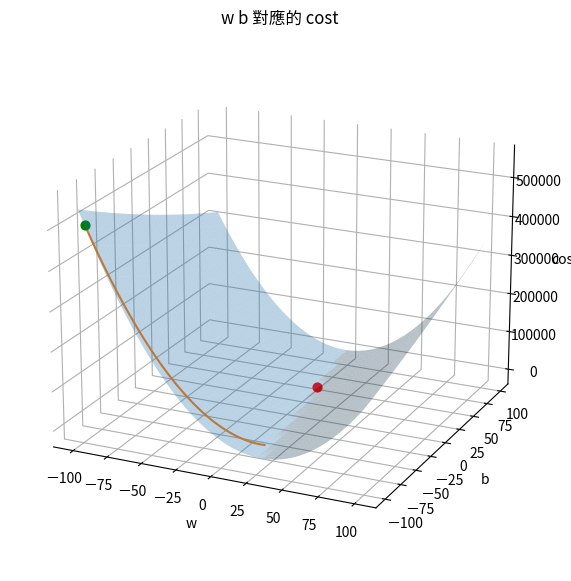

In [ ]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.view_init(20, -65) #調整角度
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))

b_grid, w_grid = np.meshgrid(bs, ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index, b_index = np.where(costs == np.min(costs))


ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)  #我是儲存第一次更新的結果
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)  #一開始的位子
ax.plot(w_hist, b_hist, c_hist)

plt.show()

In [ ]:
#總結:

#機器學習過程: 準備資料->設定model->設定cost function->設定optimizer(ex.gradient decent)
#1.先準備好一筆資料，並用一條直線來表示他，那怎樣才是最適合的直線呢?
#2.只要這些資料點和我們預測的距離平方加總越小，就說明它越適合
#3.使用gradient decent(梯度下降)來有效率地找出那條直線